## Librerías

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

## Datos

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


In [3]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Primera Exploración

In [4]:
df = housing.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [9]:
df.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


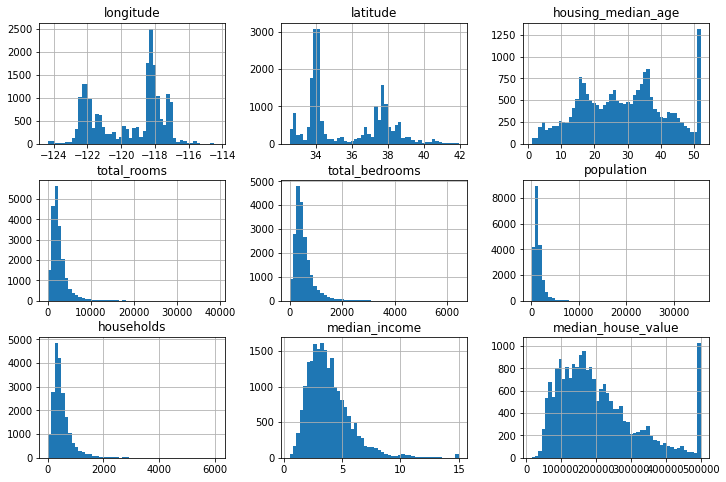

In [10]:
df.hist(bins=50, figsize=(12,8))
plt.show()

## EDA

In [11]:
# %pip install -U ydata-profiling

In [12]:
# from ydata_profiling import ProfileReport

In [13]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [14]:
# profile

In [15]:
# sns.pairplot(df, kind="reg", diag_kind="kde")

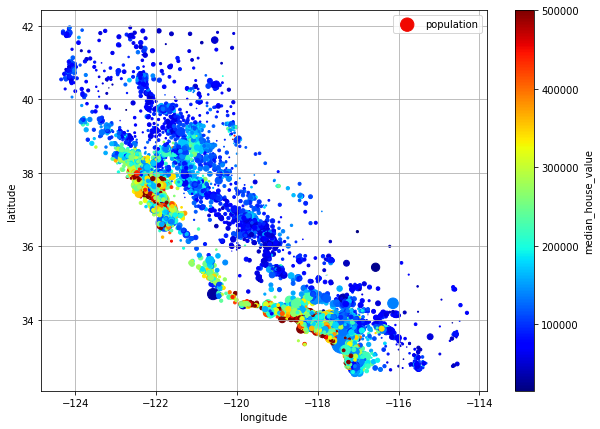

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
 s=housing["population"] / 100, label="population",
 c="median_house_value", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Tratamiento de Valores Atípicos y Missing

In [17]:
df.dropna(inplace= True)

## División de los datos 
## data ---> 80% train --> {80% train --> 20% validation}
##    |----> 20% test 

## X e y

In [18]:
# X = df.drop("median_house_value", axis=1)
# y = df["median_house_value"]

In [19]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=73)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(train_set.drop(columns="median_house_value"), train_set[["median_house_value"]], test_size=0.2, random_state=42)

# Escalado y OneHot Encoder o Label Encoder

log y StandarScaler a X_train ---> 'total_rooms','total_bedrooms', 'population', 'households', 'median_income'

StandarScaler a X_train ---> 'housing_median_age'

OneHot-Encoder a X_train --> 'ocean_proximity'

log y StandarScaler a y_train ---> 'median_house_value'

In [21]:
col_log = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]
col_std = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age"]
col_ohe = ["ocean_proximity"]
col_log_tar = ["median_house_value"]

In [29]:
X_train_log = X_train.copy()
X_val_log = X_val.copy()
y_train_log = y_train.copy()
y_val_log = y_val.copy()

# Aplicando Log
X_train_log[col_log] = np.log(X_train[col_log])
X_val_log[col_log] = np.log(X_val[col_log])
y_train_log[col_log_tar] = np.log(y_train[col_log_tar])
y_val_log[col_log_tar] = np.log(y_val[col_log_tar])

# # Aplicando StandardScaler
sca = StandardScaler()
X_train_sca = pd.DataFrame(sca.fit_transform(X_train_log[col_std]), columns=col_std, index=X_train_log.index)
X_val_sca = pd.DataFrame(sca.transform(X_val_log[col_std]), columns=col_std, index=X_val_log.index)


# Aplicando OneHot-Encoder
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed_X_train = OHE.fit_transform(X_train[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train_log.index)
X_train_sca_ohe = pd.concat([X_train_sca, transformed_df], axis=1)

transformed_X_val = OHE.transform(X_val[col_ohe])
transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_val_log.index)
X_val_sca_ohe = pd.concat([X_val_sca, transformed_df], axis=1)

# Agregar latitud y longitud
X_train_sca_ohe[['longitude','latitude']] = X_train[['longitude','latitude']]
X_val_sca_ohe[['longitude','latitude']] = X_val[['longitude','latitude']]

## Base Lines (Cross-Validation) incluye entrenar

In [37]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "SVR": SVR()
}


In [57]:
modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "SVR": SVR()
}
resultados = {}

for modelo in modelos:
    resultados[modelo]=[cross_val_score(modelos[modelo], X_train_sca_ohe, y_train_log, cv=3, scoring="r2").mean()]



c:\Users\jamr1\miniconda3\envs\gym2\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jamr1\miniconda3\envs\gym2\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jamr1\miniconda3\envs\gym2\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
pd.DataFrame(resultados).T.sort_values(by=0, ascending=False)

,0
LinearRegression,0.686102
Ridge,0.686068
SVR,0.618006
Lasso,-0.000116
Elastic Net,-0.000116


Elimino los modelos Lasso y ElasticNet porque son muy malos

## Tunning o Hiperparametros ---> Luego

## Seleccionar Modelo

In [ ]:
# posibilidad 1 usar los entrenamiento escalados
lr = LinearRegression()
lr.fit(X_train_sca_ohe,y_train_log)

In [68]:
# posibilidad 2 usar todos los datos

X_train = pd.concat([X_train_sca_ohe, X_val_sca_ohe], axis=0)
y_train = pd.concat([y_train_log, y_val_log], axis=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11040,-121.82,37.29,16.0,2085.0,394.0,1705.0,391.0,5.0225,222800.0,<1H OCEAN
4861,-117.26,32.80,30.0,1446.0,385.0,650.0,344.0,3.7440,450000.0,NEAR OCEAN
782,-120.45,34.64,27.0,2696.0,622.0,1322.0,543.0,3.0352,135400.0,NEAR OCEAN
11474,-122.72,38.42,26.0,3604.0,734.0,2605.0,704.0,3.0969,143800.0,<1H OCEAN
15705,-122.19,37.75,28.0,856.0,189.0,435.0,162.0,0.8012,81800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
9598,-118.36,33.89,40.0,756.0,122.0,371.0,130.0,5.0299,329200.0,<1H OCEAN
14247,-118.22,33.90,22.0,312.0,107.0,583.0,119.0,1.9423,98400.0,<1H OCEAN
8308,-122.32,37.93,33.0,296.0,73.0,216.0,63.0,2.6750,22500.0,NEAR BAY
14987,-121.30,37.95,9.0,674.0,242.0,575.0,193.0,2.2024,45000.0,INLAND


In [ ]:
col_log = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]
col_std = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "housing_median_age"]
col_ohe = ["ocean_proximity"]
col_log_tar = ["median_house_value"]

In [81]:
X_test = test_set.drop(columns='median_house_value')
y_test = test_set[['median_house_value']]

In [82]:

# Aplicando Log
X_test[col_log] = np.log(X_test[col_log])
y_test[col_log_tar] = np.log(y_test[col_log_tar])

# # Aplicando StandardScaler
X_test_sca = pd.DataFrame(sca.transform(X_test[col_std]), columns=col_std, index=X_test.index)


# Aplicando OneHot-Encoder
transformed_X_test = OHE.transform(X_test[col_ohe])
transformed_df = pd.DataFrame(transformed_X_test, columns=OHE.get_feature_names_out(col_ohe), index=X_test.index)
X_test_sca_ohe = pd.concat([X_test_sca, transformed_df], axis=1)

# Agregar latitud y longitud
X_test_sca_ohe[['longitude','latitude']] = X_test[['longitude','latitude']]

C:\Users\jamr1\AppData\Local\Temp\ipykernel_2068\2803819745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[col_log_tar] = np.log(y_test[col_log_tar])


In [85]:
predicc = lr.predict(X_test_sca_ohe)

In [84]:
r2_score(y_test, lr.predict(X_test_sca_ohe))

0.6941345550858558

## Revertir el escalado solamente de la predicción

In [86]:
np.exp(predicc)

array([[225075.30928897],
       [265557.5050857 ],
       [251712.83140982],
       ...,
       [160117.77954635],
       [101068.85572904],
       [508263.0227398 ]])

## Comprobar mi Modelo con los datos de test o como se conoce normalmente -----> Validar modelo (ver si tiene overfitting o underfitting)

## OneHot-Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def apply_onehot_encoder(train:pd.DataFrame, columns_to_encode:list, test:pd.DataFrame=None):
    
    # Resetear índices para evitar desalineación
    train = train.reset_index(drop=True)
    
    # Crear el OneHotEncoder
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Ajustar y transformar las columnas seleccionadas
    transformed_data = encoder.fit_transform(train[columns_to_encode])

    # Crear un DataFrame con las columnas transformadas
    transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(columns_to_encode))
    
    # Concatenar con el DataFrame original excluyendo las columnas transformadas
    df_concatenated = pd.concat([train.drop(columns_to_encode, axis=1), transformed_df], axis=1)

    # Si se proporciona un segundo DataFrame, aplicar la misma transformación
    if test is not None:
        test = test.reset_index(drop=True)
        transformed_data_to_transform = encoder.transform(test[columns_to_encode])
        transformed_df_to_transform = pd.DataFrame(transformed_data_to_transform, columns=encoder.get_feature_names_out(columns_to_encode))
        df_to_transform_concatenated = pd.concat([test.drop(columns_to_encode, axis=1), transformed_df_to_transform], axis=1)
        return df_concatenated, df_to_transform_concatenated

    return df_concatenated

In [ ]:
apply_onehot_encoder(train, ["ocean_proximity",'otra_columna'])

In [ ]:
train = df.copy()
test = df.sample(2).copy()

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train[["ocean_proximity"]])
# train_trans = encoder.transform(train[["ocean_proximity"]])

In [ ]:
transformed_df = pd.DataFrame(train_trans, columns=encoder.get_feature_names_out(['ocean_proximity']))

In [ ]:
df_concatenated = pd.concat([train.drop('ocean_proximity', axis=1), transformed_df], axis=1)

In [ ]:
df_concatenated

In [ ]:
test

In [ ]:
test_tranform = encoder.transform(test[["ocean_proximity"]])
test_tranform

In [ ]:
test_tranform_2 = pd.DataFrame(test_tranform, columns=encoder.get_feature_names_out(['ocean_proximity']))
test_tranform_2

In [ ]:
pd.concat([test.drop('ocean_proximity', axis=1), test_tranform_2], axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,4]

sns.regplot(x=np.exp(X),y=np.exp(y))